## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### **나.  학습데이터 불러오기**

In [2]:
df = pd.read_csv('train_dataset_v01.csv', delimiter=',')
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

1. url_ip_present, url_chinese_present, url_port, Result_v1 는 여부를 뜻하므로 범주형이다. 
- (url_chinese_present은 값이 없음)
2. Result_v1 열을 제외한 범주형 열 값이 0과 1 뿐이므로 별도의 조치는 안해도 될 것으로 판단됨
3. 대부분 개수, 길이를 뜻하는 수치형 데이터
4. 첫번째 컬럼은 로드 시 인덱스 열이므로 무의미
5. Result_v1 Target (benign, malicious)

In [4]:
print(df.isna().sum())
# url_path_len, url_domain_len  결측치 NaN 존재, 0으로 채움
df.fillna(value=0.0, inplace=True)
print(df.isna().sum())

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64
Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
u

In [5]:
df.describe()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0
mean,1831.500000,54.559225,0.412937,29.357806,20.377729,20.330513,2.516921,0.272653,4.707697,0.104258,...,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0
std,1057.850021,82.493265,0.847058,78.586016,9.601609,9.628093,1.534119,1.124592,25.318285,0.574310,...,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0
min,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,915.750000,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0
50%,1831.500000,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0
75%,2747.250000,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0
max,3663.000000,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,...,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0


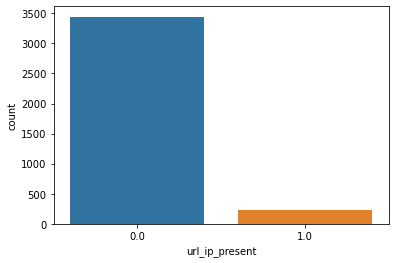

In [6]:
# 가설 1 url내에 ip가 있으면 악성사이트 일 것이다.
feature = "url_ip_present"
sns.countplot(x=feature, data=df)
plt.show()

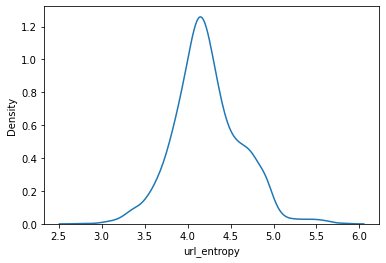

In [7]:
# 가설 2 url_entropy : URL 복잡도 가 클수록 악성사이트 일 것이다.
feature = "url_entropy"
sns.kdeplot(x=feature, data=df)
plt.show()

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [8]:
target = 'Result_v1'

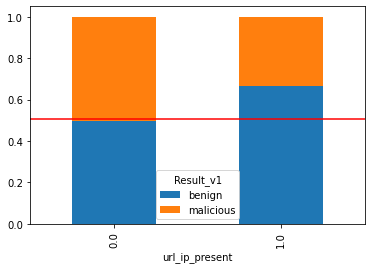

카이제곱통계량 1.4254603062250373
p-value 0.23250675009815402
기대빈도 1


In [9]:
# 가설 1 url내에 ip가 있으면 악성사이트 일 것이다.
feature = "url_ip_present"
temp = pd.crosstab(df[feature], df[target], normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-df[target].map({'benign' : 0, 'malicious' : 1}).mean(), color='r')
plt.show()
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도', result[2])

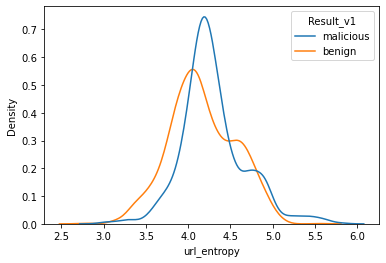

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.941981
dtype: float64


In [10]:
# 가설 2 url_entropy : URL 복잡도 가 클수록 악성사이트 일 것이다.
feature = "url_entropy"
sns.kdeplot(x=feature, data=df, hue=target)
plt.show()

import statsmodels.api as sm

model = sm.Logit(df[target].map({'benign' : 0, 'malicious' : 1}), df[feature])
result = model.fit()
print(result.pvalues)

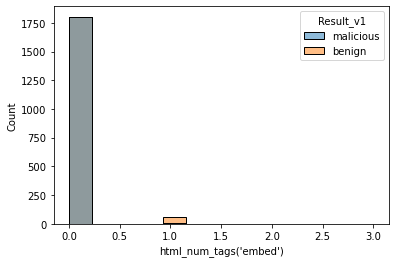

Optimization terminated successfully.
         Current function value: 0.685429
         Iterations 7
html_num_tags('embed')    3.335172e-07
dtype: float64


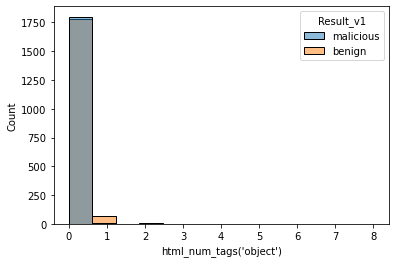

Optimization terminated successfully.
         Current function value: 0.683457
         Iterations 7
html_num_tags('object')    4.489999e-09
dtype: float64


In [11]:
# 가설 3 embed, object 태그가 많으면 악성 사이트 일 것이다.
feature = "html_num_tags('embed')"
sns.histplot(x=feature, hue=target, data=df)
plt.show()

import statsmodels.api as sm

model = sm.Logit(df[target].map({'benign' : 0, 'malicious' : 1}), df[feature])
result = model.fit()
print(result.pvalues)

feature = "html_num_tags('object')"
sns.histplot(x=feature, hue=target, data=df)
plt.show()

model = sm.Logit(df[target].map({'benign' : 0, 'malicious' : 1}), df[feature])
result = model.fit()
print(result.pvalues)


In [12]:
# url_entropy 는 강한 상관관계가 있다.
# html_num_tags('embed') 와 html_num_tags('object') 는 예상외로 관계가 없었다.
# url_ip_present 는 약한 중간 정도의 관계가 있었다.

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [13]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3664 non-null   float64
 4   url_domain_len           3664 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [14]:
# 중복 데이터 제거를 제거합니다.
df = df.drop_duplicates()

In [15]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3664 non-null   float64
 4   url_domain_len           3664 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [16]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [17]:
df_ex = df_ex.replace({'CA' : 'California', 'NY' : 'NewYork'})
print(df_ex)

      name  age       state  point
0    Alice   24     NewYork     64
1      Bob   42  California     24
2  Charlie   18  California     70
3     Dave   68          TX     70
4    Ellen   24  California     88
5    Frank   30     NewYork     57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [18]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인

pd.unique(df['Result_v1'])

array(['malicious', 'benign'], dtype=object)

In [19]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
df = df.replace({'benign' : 1, 'malicious' : -1})



In [20]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인

pd.unique(df['Result_v1'])


array([-1,  1], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [21]:
# 결축치의 존재를 확인합니다.

#위에서 이미 처리함 코드 기술
print(df.isna().sum())
# url_path_len, url_domain_len  결측치 NaN 존재, 0으로 채움



Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64


In [22]:
# 결측치를 적절히 처리해줍니다.
df.fillna(value=0.0, inplace=True)



In [23]:
# 결축치의 존재를 확인합니다.

print(df.isna().sum())

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64


---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [24]:
target = 'Result_v1'
features = df.drop(target, axis=1).columns
pearsonr = []
for feature in features:
    X = df[feature]
    Y = df[target]
    result = spst.pearsonr(X,Y)
    pearsonr.append({'feature' : feature, '상관계수' : result[0], 'p-value' : result[1]})
    
temp = pd.DataFrame(pearsonr)
temp.head(30)



,feature,상관계수,p-value
0,Unnamed: 0,-0.000809,9.609433e-01
1,url_len,-0.007512,6.494148e-01
2,url_num_hyphens_dom,-0.354017,1.227189e-108
3,url_path_len,0.100449,1.103784e-09
4,url_domain_len,-0.379724,5.276697e-126
5,url_hostname_len,-0.382665,4.298664e-128
6,url_num_dots,0.046109,5.245140e-03
7,url_num_underscores,0.128370,6.191809e-15
8,url_query_len,-0.188624,1.080125e-30
9,url_num_query_para,-0.184156,2.606444e-29


In [25]:
df = df.drop('url_chinese_present', axis=1) # 값이 없어서 삭제
df = df.drop('url_hostname_len', axis=1) # Domain_Len 과 중복되어 삭제
df = df.drop('Unnamed: 0', axis=1) # 인덱스열이라 삭제
df = df.drop("html_num_tags('applet')", axis=1) # 값이 없어서 삭제

<AxesSubplot:>

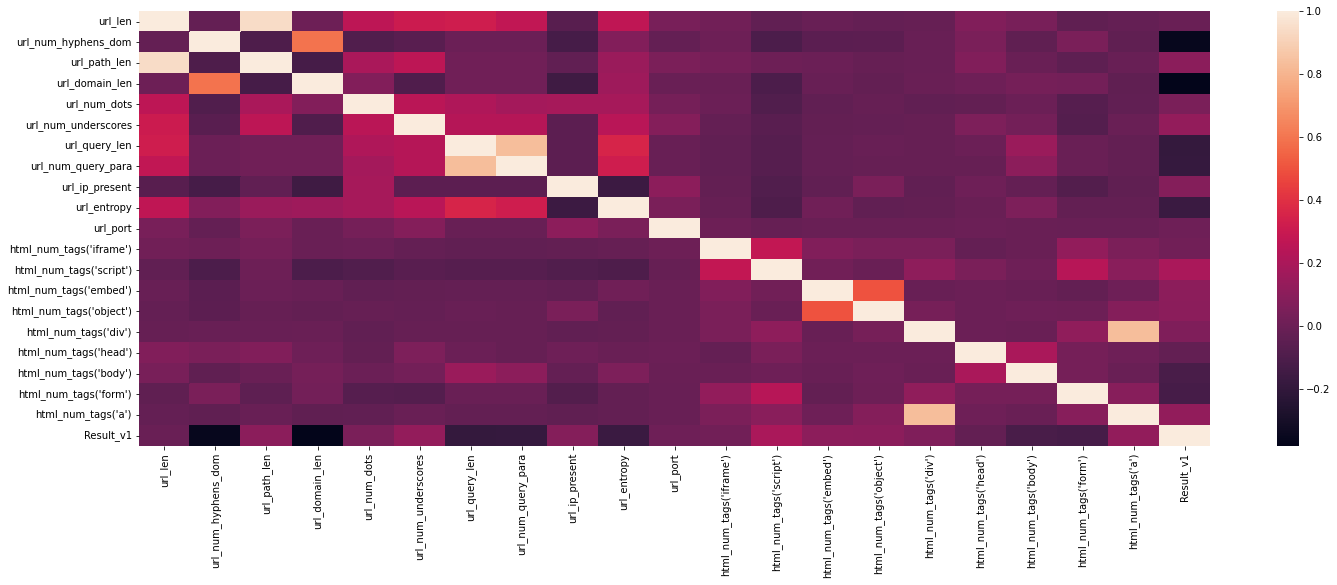

In [26]:
plt.figure(figsize=(24,8))
sns.heatmap(df.corr())

In [27]:
# # 새로운 feature 생성
# df["url_ip_port"] = df['url_ip_present'] + df['url_port']
# # df["html_num_tags_sum_1"] = df["html_num_tags('script')"] + df["html_num_tags('iframe')"]
# # df["html_num_tags_sum_2"] = df["url_query_len"] + df["url_num_query_para"]
# # df["html_num_tags_sum_3"] = df["html_num_tags('embed')"] + df["html_num_tags('object')"]
# # df["html_num_tags_sum_4"] = df["html_num_tags('div')"] + df["html_num_tags('a')"]
# # df.head(5)

# print(spst.pearsonr(df["url_ip_port"],df["Result_v1"]))
# print(spst.pearsonr(df["html_num_tags_sum_1"],df["Result_v1"]))
# print(spst.pearsonr(df["html_num_tags_sum_2"],df["Result_v1"]))
# print(spst.pearsonr(df["html_num_tags_sum_3"],df["Result_v1"]))
# print(spst.pearsonr(df["html_num_tags_sum_4"],df["Result_v1"]))

# 유의미한 상관관계를 찾을 수 없어 임시 보류

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [28]:
target = 'Result_v1'

x = df.drop(target, axis=1)
y = df.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state=2022)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(2564, 20)
(1100, 20)
(2564,)
(1100,)
